# STUDENTS GRADE PREDICTION

# Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Loading and Exploring the Dataset

In [2]:
df = pd.read_csv("Grades.csv")

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# DATA VISUALIZATION

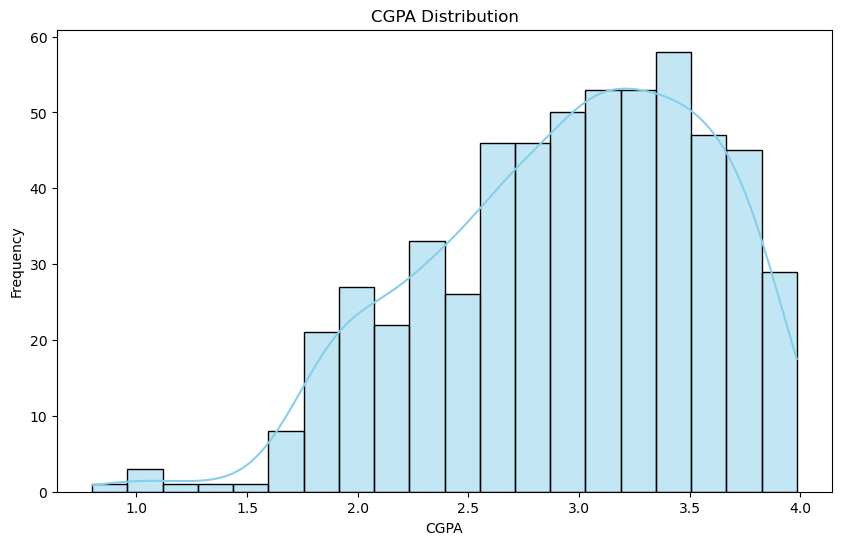

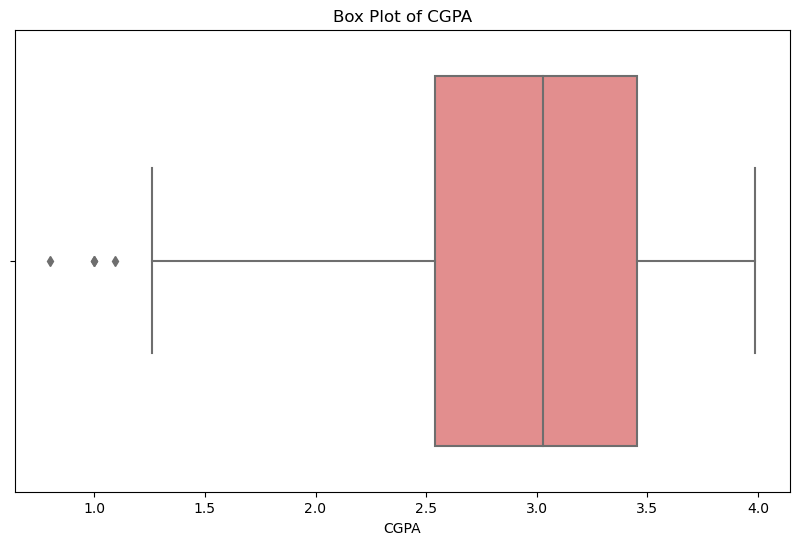

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting CGPA column
cgpa_column = df['CGPA']

# Plotting a histogram of CGPA distribution
plt.figure(figsize=(10, 6))
sns.histplot(cgpa_column, bins=20, kde=True, color='skyblue')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Plotting a box plot to visualize the spread of CGPA
plt.figure(figsize=(10, 6))
sns.boxplot(x=cgpa_column, color='lightcoral')
plt.title('Box Plot of CGPA')
plt.xlabel('CGPA')
plt.show()

In [9]:
# Exploring the dataset
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Step 3: Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [11]:
# Drop irrelevant columns like Seat No
df = df.drop(['Seat No.'], axis=1)

# Handle missing values if any
df = df.dropna()
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [12]:
# Performing one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, columns=df.columns[:-1])  # Exclude the 'CGPA' column from encoding

# Displaying the first few rows of the dataset after one-hot encoding
print("\nAfter One-Hot Encoding:")
print(df_encoded.head())


After One-Hot Encoding:
    CGPA  PH-121_A  PH-121_A+  PH-121_A-  PH-121_B  PH-121_B+  PH-121_B-  \
0  2.205         0          0          0         0          0          1   
1  2.008         1          0          0         0          0          0   
2  3.608         1          0          0         0          0          0   
3  1.906         0          0          0         0          0          0   
4  3.448         0          0          1         0          0          0   

   PH-121_C  PH-121_C+  PH-121_C-  ...  CS-412_B  CS-412_B+  CS-412_B-  \
0         0          0          0  ...         0          0          0   
1         0          0          0  ...         1          0          0   
2         0          0          0  ...         0          0          0   
3         0          0          0  ...         0          0          0   
4         0          0          0  ...         0          0          0   

   CS-412_C  CS-412_C+  CS-412_C-  CS-412_D  CS-412_D+  CS-412_F  CS-412_

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Columns: 473 entries, CGPA to CS-412_W
dtypes: float64(1), uint8(472)
memory usage: 198.7 KB


# Step 4: Split the Data into Training and Testing Sets

In [13]:
# Separating features (X) and target variable (y)
X = df_encoded.drop(['CGPA'], axis=1)
y = df_encoded['CGPA']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (333, 472)
X_test shape: (84, 472)
y_train shape: (333,)
y_test shape: (84,)


# VISUALIZING DATA AFTER PROCESSING

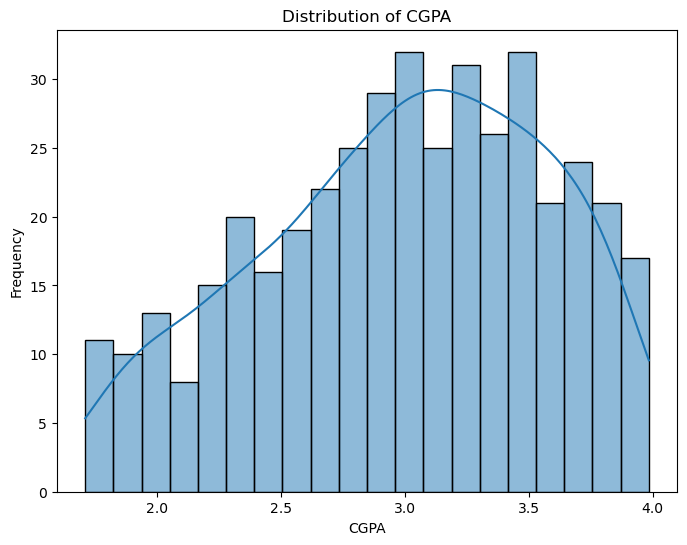

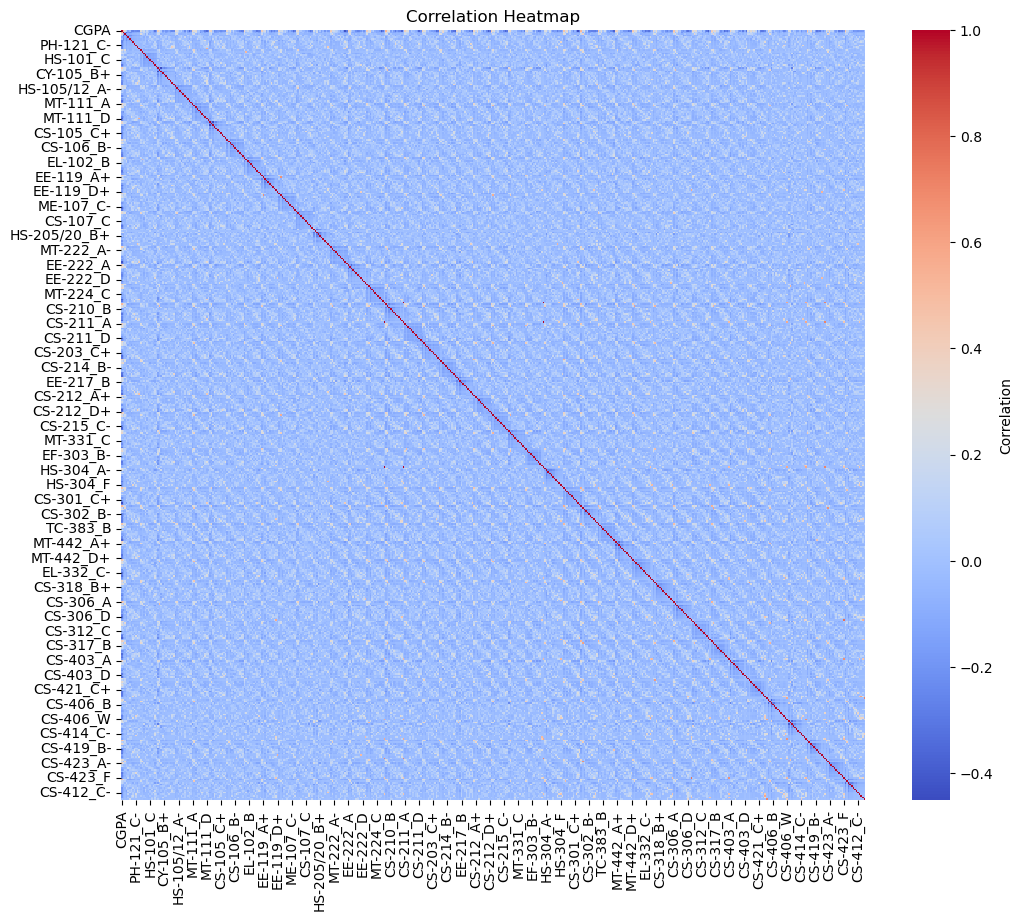

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable 'CGPA'
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['CGPA'], bins=20, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", annot=False, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()


# Step 5: Building a Machine Learning Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.003661698036204586
R-squared: 0.9900314615675516


**Observations:**

The model is highly accurate, as indicated by the low MSE and high R-squared.
The model explains a significant portion of the variance in the CGPA, suggesting that the selected features are informative for predicting the target variable.
Given the high R-squared, it appears that the linear relationship between the features and CGPA is well captured by the model.

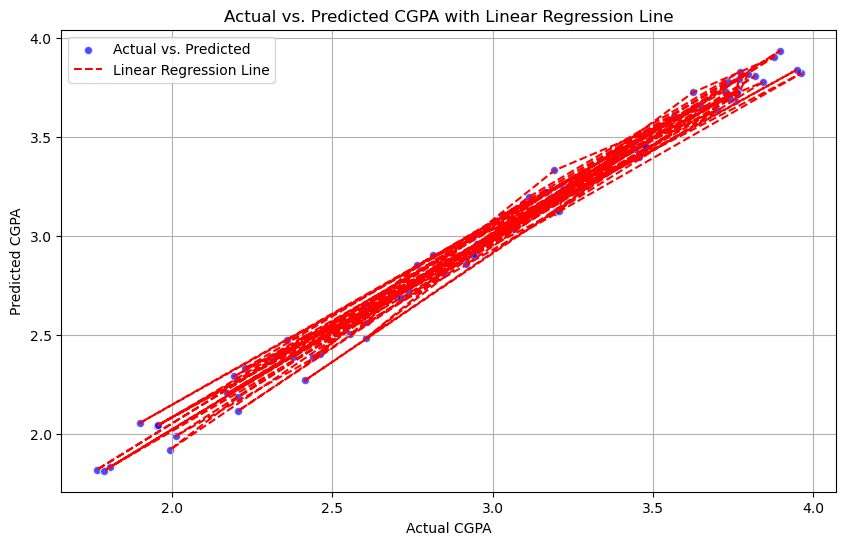

In [18]:
# Plotting actual vs. predicted CGPA with linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='w', label='Actual vs. Predicted')

# Linear regression line using X_test
x_line = np.linspace(min(y_test), max(y_test), len(y_test))
y_line = model.predict(X_test)
plt.plot(y_test, y_line, color='red', linestyle='--', label='Linear Regression Line')

plt.title('Actual vs. Predicted CGPA with Linear Regression Line')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Grade Prediction

In [24]:
y_pred_test = model.predict(X_test)

# Defining CGPA-to-grade mapping function
def map_cgpa_to_grade(cgpa):
    if cgpa >= 3.5:
        return 'A'
    elif 3.0 <= cgpa < 3.5:
        return 'B'
    elif 2.5 <= cgpa < 3.0:
        return 'C'
    elif 2.0 <= cgpa < 2.5:
        return 'D'
    else:
        return 'F'

# Map predicted CGPA values to grades
predicted_grades_test = [map_cgpa_to_grade(cgpa) for cgpa in y_pred_test]

# Displaying the predicted grades on the test set
print("Predicted Grades on Test Data:")
print(predicted_grades_test)

Predicted Grades on Test Data:
['A', 'D', 'C', 'A', 'B', 'D', 'A', 'C', 'A', 'B', 'A', 'B', 'D', 'B', 'A', 'B', 'F', 'D', 'C', 'B', 'D', 'C', 'B', 'D', 'A', 'F', 'B', 'B', 'A', 'B', 'C', 'A', 'D', 'B', 'C', 'A', 'C', 'D', 'B', 'A', 'A', 'A', 'A', 'D', 'C', 'C', 'F', 'D', 'A', 'B', 'A', 'C', 'B', 'B', 'D', 'B', 'C', 'D', 'A', 'D', 'B', 'A', 'C', 'C', 'C', 'D', 'C', 'D', 'B', 'A', 'A', 'C', 'A', 'C', 'C', 'B', 'F', 'B', 'B', 'B', 'F', 'C', 'B', 'B']


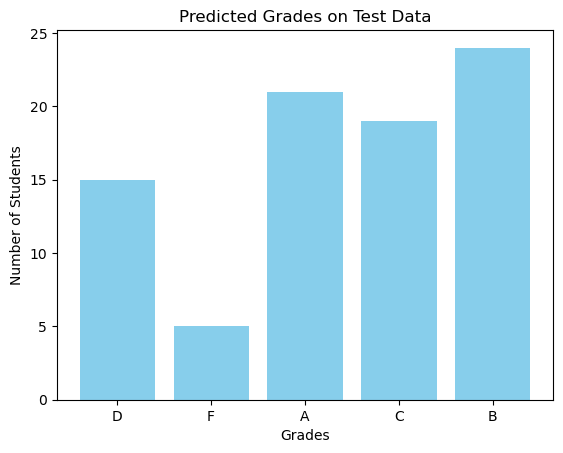

In [26]:
predicted_grades = ['A', 'D', 'C', 'A', 'B', 'D', 'A', 'C', 'A', 'B', 'A', 'B', 'D', 'B', 'A', 'B', 'F', 'D', 'C', 'B', 'D', 'C', 'B', 'D', 'A', 'F', 'B', 'B', 'A', 'B', 'C', 'A', 'D', 'B', 'C', 'A', 'C', 'D', 'B', 'A', 'A', 'A', 'A', 'D', 'C', 'C', 'F', 'D', 'A', 'B', 'A', 'C', 'B', 'B', 'D', 'B', 'C', 'D', 'A', 'D', 'B', 'A', 'C', 'C', 'C', 'D', 'C', 'D', 'B', 'A', 'A', 'C', 'A', 'C', 'C', 'B', 'F', 'B', 'B', 'B', 'F', 'C', 'B', 'B']

# Count the occurrences of each grade
grade_counts = {grade: predicted_grades.count(grade) for grade in set(predicted_grades)}

# Create a bar plot
grades = list(grade_counts.keys())
counts = list(grade_counts.values())

plt.bar(grades, counts, color='skyblue')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Predicted Grades on Test Data')
plt.show()

**Observation on Predicted Grades:**

The predicted grades on the test data are as follows:

Majority of the students have grades 'A', 'B', 'C', and 'D'.
There are some 'F' grades predicted, indicating students who may struggle academically.
The model seems to be performing reasonably well, covering a range of grades.

# Step 7: Saving the Model

In [25]:
import pickle

# Save the model to a file
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully to {model_filename}")

# Load the saved model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")
# Now 'loaded_model' can be used for predictions as before


Model saved successfully to linear_regression_model.pkl
Model loaded successfully.
